<a href="https://colab.research.google.com/github/MaryamS5/ML_Work/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np

In [3]:
#  Load the dataset
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/drive/MyDrive/Automobile_data (1).csv')

In [5]:
# . Show basic information about the dataset (data types, non-null counts, etc.)
train.info()  # Display the structure of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          178 non-null    int64  
 1   normalized-losses  178 non-null    float64
 2   make               178 non-null    object 
 3   fuel-type          178 non-null    object 
 4   aspiration         178 non-null    object 
 5   num-of-doors       176 non-null    object 
 6   body-style         178 non-null    object 
 7   drive-wheels       178 non-null    object 
 8   engine-location    178 non-null    object 
 9   wheel-base         178 non-null    float64
 10  length             178 non-null    float64
 11  width              178 non-null    float64
 12  height             178 non-null    float64
 13  curb-weight        178 non-null    int64  
 14  engine-type        178 non-null    object 
 15  num-of-cylinders   178 non-null    object 
 16  engine-size        178 non

In [6]:
train.mean(numeric_only=True)  # Show mean of numeric columns


,0
symboling,0.780899
normalized-losses,118.370787
wheel-base,99.022472
length,174.537640
width,65.942135
height,53.869663
curb-weight,2563.455056
engine-size,127.022472
bore,3.346379
stroke,3.253506


In [7]:
train.median(numeric_only=True)  # Show median of numeric columns

,0
symboling,1.000000
normalized-losses,122.166667
wheel-base,97.000000
length,173.200000
width,65.500000
height,54.100000
curb-weight,2434.000000
engine-size,120.000000
bore,3.320000
stroke,3.290000


In [11]:
#Find duplicates:

duplicates = train[train.duplicated()]  # Identify duplicated rows
print(duplicates)  # Display duplicate rows, if any

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]


In [10]:

duplicates = train[train.duplicated("normalized-losses")]  # Identify duplicated rows
print(duplicates)  # Display duplicate rows, if any

     symboling  normalized-losses         make fuel-type aspiration  \
1            3         122.166667  alfa-romero       gas        std   
3            2         164.000000         audi       gas        std   
4            2         122.166667         audi       gas        std   
6            1         122.166667         audi       gas        std   
7            1         158.000000         audi       gas      turbo   
..         ...                ...          ...       ...        ...   
172         -1          74.000000        volvo       gas      turbo   
174         -1          95.000000        volvo       gas      turbo   
175         -1          95.000000        volvo       gas        std   
176         -1          95.000000        volvo    diesel      turbo   
177         -1          95.000000        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
1            two  convertible          rwd           front        88

In [12]:
train = train.drop_duplicates()  # Remove duplicate rows

In [15]:
#Replace '?' with NaN and check for missing values:
missing_values = train.isnull().sum()  # Count missing values for each column
train.replace('?', np.nan, inplace=True)  # Replace all '?' with NaN

print("Missing values:\n", missing_values)  # Display missing values

Missing values:
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [16]:
#Drop rows with missing values in the 'price' column:


train.dropna(subset=['price'], inplace=True)  # Remove rows where 'price' is missing

In [17]:
# 7. Display basic statistics (mean, median)
# Display the mean of all numeric columns
print("Mean of numeric columns:\n", train.mean(numeric_only=True))
# Display the median of all numeric columns
print("Median of numeric columns:\n", train.median(numeric_only=True))


Mean of numeric columns:
 symboling                0.780899
normalized-losses      118.370787
wheel-base              99.022472
length                 174.537640
width                   65.942135
height                  53.869663
curb-weight           2563.455056
engine-size            127.022472
bore                     3.346379
stroke                   3.253506
compression-ratio       10.179888
horsepower             102.528409
peak-rpm              5092.329545
city-mpg                25.196629
highway-mpg             30.651685
price                13386.117978
dtype: float64
Median of numeric columns:
 symboling                1.000000
normalized-losses      122.166667
wheel-base              97.000000
length                 173.200000
width                   65.500000
height                  54.100000
curb-weight           2434.000000
engine-size            120.000000
bore                     3.320000
stroke                   3.290000
compression-ratio        9.000000
horsepower   

In [21]:
#Impute missing values in 'normalized-losses' with the mean:


train['normalized-losses'] = pd.to_numeric(train['normalized-losses'], errors='coerce') # Convert 'normalized-losses' column to numeric, coercing errors to NaN
mean_normalized_losses = train['normalized-losses'].mean()  # Calculate mean
train['normalized-losses'].fillna(mean_normalized_losses, inplace=True)  # Fill NaN  with mean

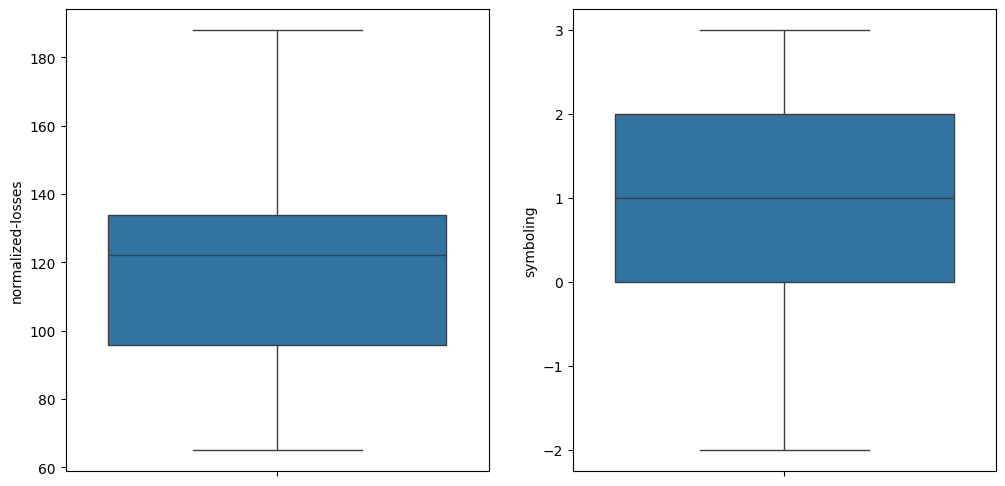

In [26]:
#Find outliers in 'normalized-losses' and 'symboling' with boxplots:
# . Identify outliers in 'normalized-losses' and 'symboling' columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['normalized-losses'])  # Boxplot for 'normalized-losses'
plt.subplot(1, 2, 2)
sns.boxplot(y=train['symboling'])  # Boxplot for 'symboling'
plt.show()

In [28]:
# Filter rows where 'price' is less than 20000
filtered_data = train[train['price'] < 20000]

In [32]:
# Apply the outlier removal function to 'normalized-losses' and 'symboling'
train = remove_outliers(train, 'normalized-losses')
train = remove_outliers(train, 'symboling')

In [29]:
train.to_csv('cleaned_automobile_data.csv', index=False)  # Save cleaned data

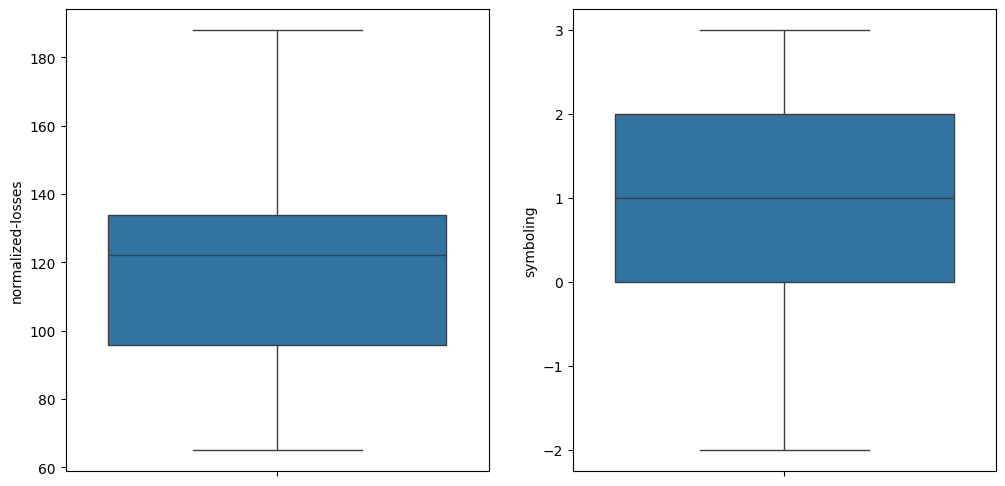

In [34]:
#Visualize the cleaned data after outlier removal:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['normalized-losses'])  # Boxplot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(y=train['symboling'])  # Boxplot after outlier removal
plt.show()